## Social Network Analysis

#### Import all of the necessary packages

In [1]:
import networkx
from operator import itemgetter
import matplotlib.pyplot

#### Read the data from the amazon-books.txt file

In [4]:
fhr = open('/Users/AnayGupta/Desktop/SocialNetworkAnalysis/amazon-books.txt', 'r', encoding='utf-8', errors='ignore')
amazonBooks = {}
fhr.readline()
for line in fhr:
    cell = line.split('\t')
    MetaData = {}
    MetaData['Id'] = cell[0].strip() 
    ASIN = cell[1].strip()
    MetaData['Title'] = cell[2].strip()
    MetaData['Categories'] = cell[3].strip()
    MetaData['Group'] = cell[4].strip()
    MetaData['SalesRank'] = int(cell[5].strip())
    MetaData['TotalReviews'] = int(cell[6].strip())
    MetaData['AvgRating'] = float(cell[7].strip())
    MetaData['DegreeCentrality'] = int(cell[8].strip())
    MetaData['ClusteringCoeff'] = float(cell[9].strip())
    amazonBooks[ASIN] = MetaData
fhr.close()

#### Create a weighted graph and print out the book information being examined

In [6]:
fhr=open("/Users/AnayGupta/Desktop/SocialNetworkAnalysis/amazon-books-copurchase.edgelist", 'rb')
copurchaseGraph=networkx.read_weighted_edgelist(fhr)
fhr.close()

# Now let's assume a person is considering buying the following book;
# what else can we recommend to them based on copurchase behavior 
# we've seen from other users?
print ("Looking for Recommendations for Customer Purchasing this Book:")
print ("--------------------------------------------------------------")
purchasedAsin = '0805047905'

# Let's first get some metadata associated with this book
print ("ASIN = ", purchasedAsin) 
print ("Title = ", amazonBooks[purchasedAsin]['Title'])
print ("SalesRank = ", amazonBooks[purchasedAsin]['SalesRank'])
print ("TotalReviews = ", amazonBooks[purchasedAsin]['TotalReviews'])
print ("AvgRating = ", amazonBooks[purchasedAsin]['AvgRating'])
print ("DegreeCentrality = ", amazonBooks[purchasedAsin]['DegreeCentrality'])
print ("ClusteringCoeff = ", amazonBooks[purchasedAsin]['ClusteringCoeff'])

Looking for Recommendations for Customer Purchasing this Book:
--------------------------------------------------------------
ASIN =  0805047905
Title =  Brown Bear, Brown Bear, What Do You See?
SalesRank =  171
TotalReviews =  172
AvgRating =  5.0
DegreeCentrality =  216
ClusteringCoeff =  0.65


### Look at the Ego Network associated with the customer purchasing the book above

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


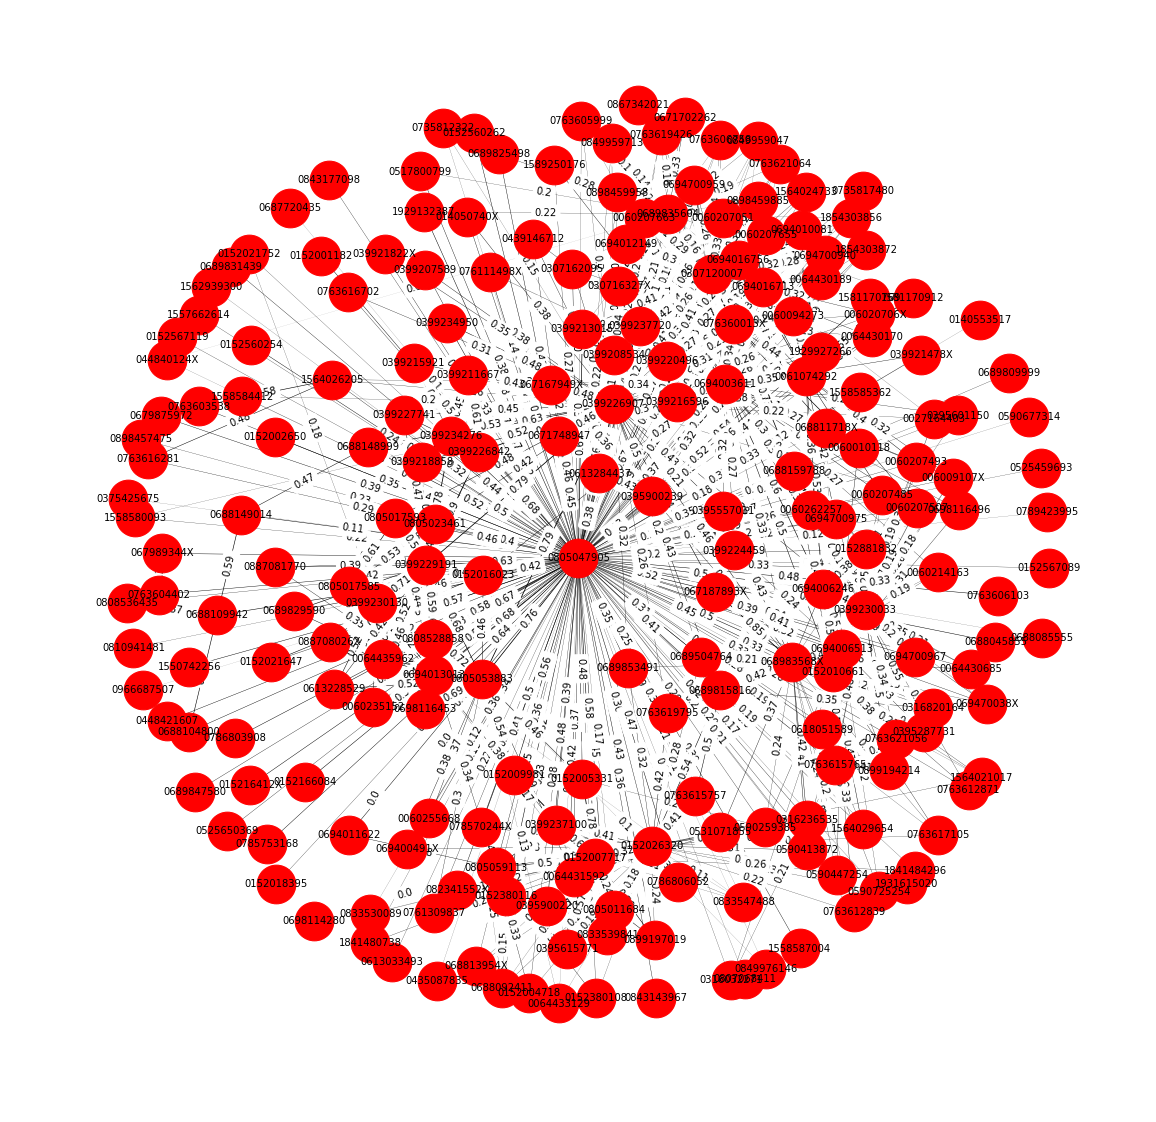

In [9]:
purchasedAsinEgoGraph = networkx.ego_graph(copurchaseGraph, purchasedAsin, radius=1)

# -------------------------------------------------------------------------------
#           Print the Ego Network       
pos=networkx.spring_layout(purchasedAsinEgoGraph)
matplotlib.pyplot.figure(figsize=(20,20))
networkx.draw_networkx_nodes(purchasedAsinEgoGraph,pos,node_size=1500)
networkx.draw_networkx_labels(purchasedAsinEgoGraph,pos,font_size=10)
edgewidth = [ d['weight'] for (u,v,d) in purchasedAsinEgoGraph.edges(data=True)]
networkx.draw_networkx_edges(purchasedAsinEgoGraph,pos,width=edgewidth)
edgelabel = networkx.get_edge_attributes(purchasedAsinEgoGraph,'weight')
networkx.draw_networkx_edge_labels(purchasedAsinEgoGraph,pos,edge_labels=edgelabel,font_size=10)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.show()
# -------------------------------------------------------------------------------

### Use the island method to retain the books that are highly similar to the one purchased

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:861: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


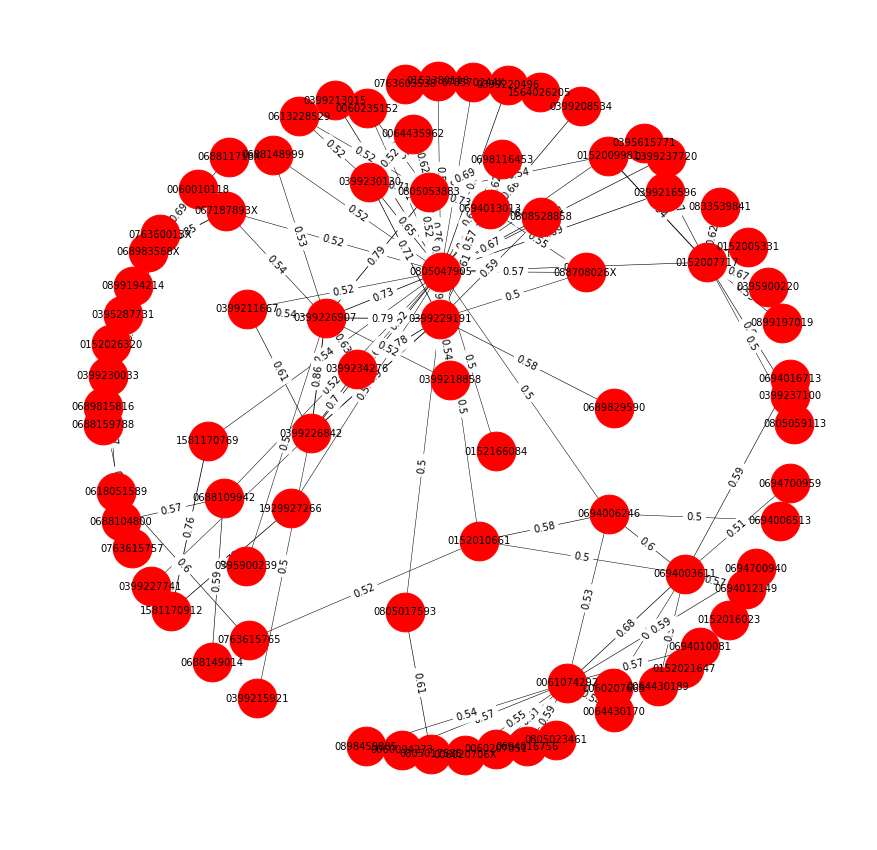

In [10]:
threshold = 0.5
purchasedAsinEgoTrimGraph = networkx.Graph()
for f, t, e in purchasedAsinEgoGraph.edges(data=True):
    if e['weight'] >= threshold:
        purchasedAsinEgoTrimGraph.add_edge(f,t,e)
        
# -------------------------------------------------------------------------------
#           PRINT THE ISLAND GRAPH       

pos=networkx.spring_layout(purchasedAsinEgoTrimGraph)
matplotlib.pyplot.figure(figsize=(15,15))
networkx.draw_networkx_nodes(purchasedAsinEgoTrimGraph,pos,node_size=1500)
networkx.draw_networkx_labels(purchasedAsinEgoTrimGraph,pos,font_size=10)
edgewidth = [ d['weight'] for (u,v,d) in purchasedAsinEgoTrimGraph.edges(data=True)]
networkx.draw_networkx_edges(purchasedAsinEgoTrimGraph,pos,width=edgewidth)
edgelabel = networkx.get_edge_attributes(purchasedAsinEgoTrimGraph,'weight')
networkx.draw_networkx_edge_labels(purchasedAsinEgoTrimGraph,pos,edge_labels=edgelabel,font_size=10)
matplotlib.pyplot.axis('off') 
matplotlib.pyplot.show()       
# -------------------------------------------------------------------------------

### Identify the direct neighbors of the purchased book

In [12]:
purchasedAsinNeighbors = []
purchasedAsinNeighbors = purchasedAsinEgoTrimGraph.neighbors(purchasedAsin)
# print(len(purchasedAsinNeighbors))
print(purchasedAsinNeighbors)

['0152009981', '0152166084', '0399216596', '0152380116', '0688109942', '0694013013', '088708026X', '0399234276', '0152010661', '0805053883', '0064435962', '1581170769', '0399237720', '0399226907', '0399208534', '0808528858', '0399218858', '0698116453', '0399229191', '078570244X', '0399213015', '0060235152', '0399230130', '1929927266', '067187893X', '0152007717', '0688148999', '0399211667', '0399226842', '0399220496', '0694006246']


### Choose the top 5 book recommendations among all of the neighbors of the purchased book.

#### The formula used for calculating the new edge weights is as follows:
    (ClusteringCoefficient * DegreeCentrality)/(SalesRank)

In [15]:
weights = {}
for a in purchasedAsinNeighbors:
    # print('ASIN:',a)
    # print('Clustering Coefficient:', amazonBooks[a]['ClusteringCoeff'])
    # print('Degree Centrality:', amazonBooks[a]['DegreeCentrality'])
    # print('Average Rating:', amazonBooks[a]['AvgRating'])
    dc = amazonBooks[a]['DegreeCentrality']
    cc = amazonBooks[a]['ClusteringCoeff']
    sales = amazonBooks[a]['SalesRank']
    val = (cc*dc)/sales
    val = round(val, 5)
    # print('Value:', val)
    weights[a] = val
    # print()
# print(weights)
print()

# Sort the books by the newly calculated weights
sorted_weights = sorted(weights.items(), key=itemgetter(1), reverse=True)
print('Sorted dictionary:')
print(sorted_weights)
top5 = {}

# Store the top 5 weighted books into a new dictionary
i = 0
while i < 5:
    top5[sorted_weights[i][0]] = sorted_weights[i][1]
    i = i + 1
print()
print('Top 5 Book Recommendations')
print(top5)
print()


Sorted dictionary:
[('0399226907', 0.30767), ('0805053883', 0.01152), ('0152010661', 0.01095), ('0399229191', 0.01015), ('0694013013', 0.00462), ('0399226842', 0.00367), ('0694006246', 0.00345), ('0399208534', 0.00236), ('0399230130', 0.00192), ('0399234276', 0.00143), ('0152007717', 0.00037), ('0399218858', 0.00032), ('067187893X', 0.0003), ('0399211667', 0.00028), ('1581170769', 0.00014), ('0060235152', 0.00011), ('088708026X', 4e-05), ('0399237720', 4e-05), ('0152380116', 3e-05), ('0688109942', 3e-05), ('0399220496', 3e-05), ('0152009981', 2e-05), ('0064435962', 2e-05), ('0698116453', 2e-05), ('0152166084', 1e-05), ('0399216596', 1e-05), ('0808528858', 1e-05), ('0399213015', 1e-05), ('0688148999', 1e-05), ('078570244X', 0.0), ('1929927266', 0.0)]

Top 5 Book Recommendations
{'0399226907': 0.30767, '0805053883': 0.01152, '0152010661': 0.01095, '0399229191': 0.01015, '0694013013': 0.00462}



### Print the top 5 book recommendations

In [16]:
j = 1
print ("Top 5 Recommendations for Customer")
print ("-------------------------------------")
for rec in top5.keys():
    # print(rec)
    print("Recommendation #", j)
    print ("ASIN = ", rec) 
    print ("Title = ", amazonBooks[rec]['Title'])
    print ("SalesRank = ", amazonBooks[rec]['SalesRank'])
    print ("TotalReviews = ", amazonBooks[rec]['TotalReviews'])
    print ("AvgRating = ", amazonBooks[rec]['AvgRating'])
    print ("DegreeCentrality = ", amazonBooks[rec]['DegreeCentrality'])
    print ("ClusteringCoeff = ", amazonBooks[rec]['ClusteringCoeff'])
    j = j + 1
    print()

Top 5 Recommendations for Customer
-------------------------------------
Recommendation # 1
ASIN =  0399226907
Title =  The Very Hungry Caterpillar board book
SalesRank =  279
TotalReviews =  164
AvgRating =  4.5
DegreeCentrality =  116
ClusteringCoeff =  0.74

Recommendation # 2
ASIN =  0805053883
Title =  Polar Bear, Polar Bear, What Do You Hear?
SalesRank =  2515
TotalReviews =  29
AvgRating =  4.5
DegreeCentrality =  42
ClusteringCoeff =  0.69

Recommendation # 3
ASIN =  0152010661
Title =  Time for Bed
SalesRank =  3122
TotalReviews =  87
AvgRating =  5.0
DegreeCentrality =  60
ClusteringCoeff =  0.57

Recommendation # 4
ASIN =  0399229191
Title =  The Very Busy Spider (Board Book)
SalesRank =  2558
TotalReviews =  27
AvgRating =  4.5
DegreeCentrality =  49
ClusteringCoeff =  0.53

Recommendation # 5
ASIN =  0694013013
Title =  From Head to Toe Board Book
SalesRank =  6026
TotalReviews =  22
AvgRating =  5.0
DegreeCentrality =  48
ClusteringCoeff =  0.58



In [17]:
!jupyter nbconvert SocialNetworkAnalysis.ipynb --to html

[NbConvertApp] Converting notebook SocialNetworkAnalysis.ipynb to html
[NbConvertApp] Writing 1404558 bytes to SocialNetworkAnalysis.html
